# K- means clustering 

- initialization: randomly select k data points to represent the center of your data 
- assignment :assign each data point to the nearest centroid 
- update the new centroids 
- repeat
## objective function 
- it's the distance between each data point and the centroid it's assigned to it .
- __the objective function is not convex thus the convergence is not guaranteed to a global minimum__ 
- the convergence is prone to the location of the initialization ! __to avoid the algorithm stuck on local optima you should try multiple random initialization__
$J(c^{(1)} , \dots,c^{(2)} , \mu_{1}, \dots \mu_{k)}= \frac{1}{m}\Sigma
_{i=1}^{m}||x^{(i)}-\mu_{c^(i)}||^2$

## choosing the  number of clusters 
it's a hyper parameter  , we can use 
- visual method to identify the suitable number of clusters 
- using the elbow method , by plotting the number of clusters vs the cost function .

## coding 

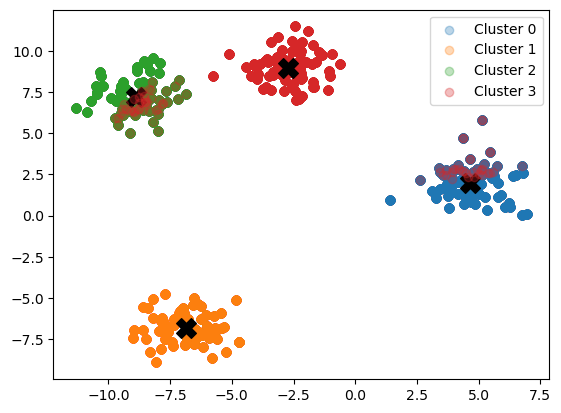

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import defaultdict

class KMeansCustom:
    def __init__(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        # dict of indices [0-K-1]: for each cluster idx: list of its points
        self.clusters = defaultdict(list)
        # List of indices [0-K-1]: for each cluster idx: D-dimensional vector for centroid
        self.centroids = []

    def initialize_centroids(self, data):
        # select k random different centroids: assumes k <= # number of examples
        random_indices = np.random.choice(data.shape[0], self.k, replace=False)
        self.centroids = data[random_indices]

    def _dist(self, point, centroid):
        return np.linalg.norm(point - centroid)    
        
        # return np.sum((point - centroid)**2)        # we don't need actual distance

    def assign_clusters(self, data):
        # self.clusters = {i: [] for i in range(self.k)}
        for point in data:
            distances = [self._dist(point, centroid) for centroid in self.centroids]
            cluster_idx = np.argmin(distances)
            self.clusters[cluster_idx].append(point)    # add cluster points

    def update_centroids(self):
        for cluster_idx, cluster_points in self.clusters.items():
            # Average points of each cluster. axis=0 ==> vertically
            self.centroids[cluster_idx] = np.mean(cluster_points, axis=0)

    def fit(self, data):
        self.initialize_centroids(data)

        for _ in range(self.max_iter):
            self.assign_clusters(data)
            prev_centroids = np.copy(self.centroids)
            self.update_centroids()

            # Check for convergence
            if np.allclose(self.centroids, prev_centroids, rtol=1e-4):
                break

    def predict(self, data):
        predictions = []
        for point in data:
            distances = [self._dist(point, centroid) for centroid in self.centroids]
            cluster_idx = np.argmin(distances)
            predictions.append(cluster_idx)
        return predictions




if __name__ == '__main__':
    np.random.seed(17)

    # Generate some data
    data, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

    # Create and fit KMeans
    kmeans = KMeansCustom(k=4)
    kmeans.fit(data)

    # Assign clusters
    predicted_labels = kmeans.predict(data)

    # Visualize clusters
    for i in range(kmeans.k):
        plt.scatter(np.array(kmeans.clusters[i])[:, 0], np.array(kmeans.clusters[i])[:, 1], label=f'Cluster {i}' , alpha=0.3)
        plt.scatter(kmeans.centroids[i][0], kmeans.centroids[i][1], s=200, marker='X', color='black')  # centroid

    plt.legend()
    plt.show()

testing with `sklearn.cluster.KMeans`

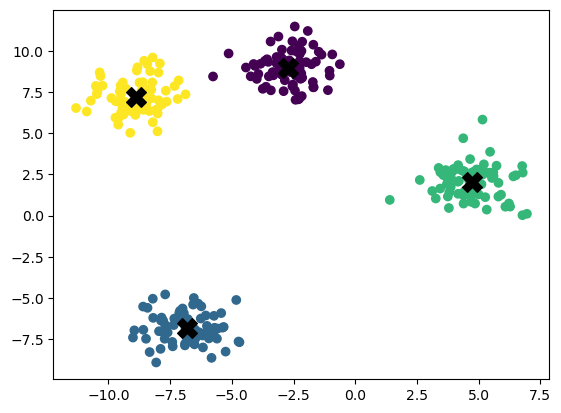

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4)
kmeans.fit(data)

plt.scatter(data[:,0] , data[:,1], c = kmeans.predict(data))
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1] , s=200 , marker  = 'X' , color = 'black')